In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## SIRD model in Python 

In [18]:
def deriv(y, t, N, beta, gamma, rho):
    S, I, R, D= y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I - R*rho
    dDdt = R*rho
    return dSdt, dIdt, dRdt, dDdt

## Graph SIRD model

In [27]:
def plotSIRD(tf, N, beta, gamma, rho):
    t = np.linspace(0, tf, tf)

    y0 = N, 1, 0, 0

    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta, gamma, rho))
    S, I, R, D = ret.T

    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
    ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    ax.plot(t, D/1000, 'y', alpha=0.5, lw=2, label='Died')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number (1000s)')
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()
    

/var/folders/m1/788d4jvn7wz8lm3qp0_815hc0000gn/T/ipykernel_1671/3032437299.py:21: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


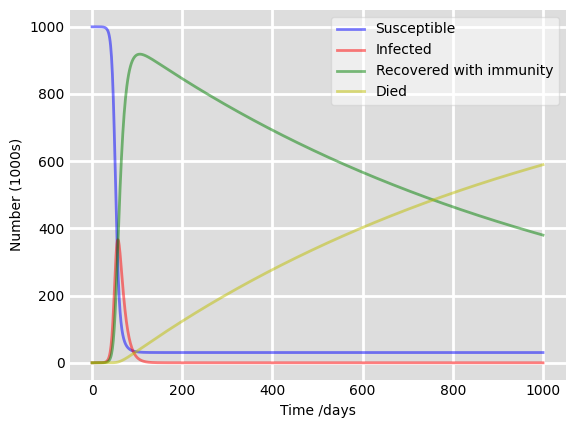

In [32]:
plotSIRD(1000,1000000,0.36,1./10,0.001)

/var/folders/m1/788d4jvn7wz8lm3qp0_815hc0000gn/T/ipykernel_1671/2512370104.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


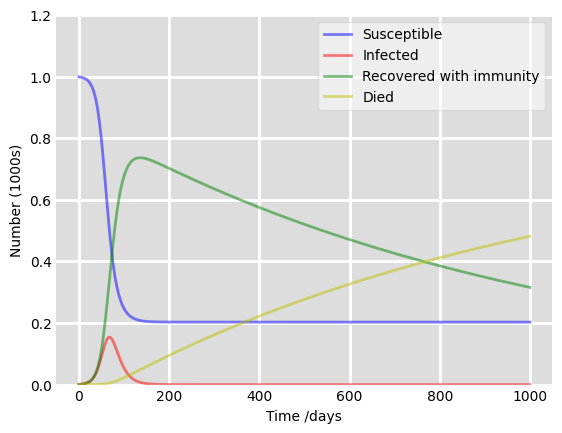

In [23]:
# Initial conditions vector
y0 = 999, 1, 0, 0

ee= 1000
# A grid of time points (in days)
beta, gamma, rho = 0.2, 1./10, 0.001
N = 1000
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, rho))
S, I, R, D = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t, D/1000, 'y', alpha=0.5, lw=2, label='Died')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()